In [52]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
hoops_df = pd.read_csv('../Resources/cbb.csv')
hoops_df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,Michigan St.,B10,35,26,111.4,87.8,0.9392,50.6,44.5,20.8,...,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16,3.0,2013
2451,Arizona,P12,35,27,114.4,92.2,0.9229,52.5,46.6,19.5,...,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16,6.0,2013
2452,Oregon,P12,37,28,104.8,88.6,0.8728,49.3,46.4,21.4,...,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16,12.0,2013
2453,La Salle,A10,34,24,112.0,96.2,0.8516,51.9,49.3,17.1,...,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16,13.0,2013


In [54]:
hoops_df = hoops_df.drop(["G","TEAM","SEED","CONF","YEAR"], axis=1)
hoops_df

,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND
1,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND
2,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND
3,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND
4,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,26,111.4,87.8,0.9392,50.6,44.5,20.8,19.2,36.1,27.6,36.6,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16
2451,27,114.4,92.2,0.9229,52.5,46.6,19.5,19.8,35.0,26.7,37.4,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16
2452,28,104.8,88.6,0.8728,49.3,46.4,21.4,22.0,35.8,27.2,38.4,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16
2453,24,112.0,96.2,0.8516,51.9,49.3,17.1,21.3,29.0,34.2,31.3,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16


In [55]:
hoops_df.dropna(inplace=True)

In [56]:
class_count = hoops_df['POSTSEASON'].value_counts()
class_count

R64          224
R32          112
S16           56
E8            28
R68           28
F4            14
2ND            7
Champions      7
Name: POSTSEASON, dtype: int64

In [57]:
classifications_to_replace = list(class_count.index)

for cls in classifications_to_replace:
    if cls == "R68":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"7")
    elif cls == "R64":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"7")
    elif cls == "R32":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"6")
    elif cls == "S16":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"5")
    elif cls == "E8":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"4")
    elif cls == "F4":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"3")
    elif cls == "2ND":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"2")
    elif cls == "Champions":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"1")

hoops_df['POSTSEASON'].value_counts()

7    252
6    112
5     56
4     28
3     14
2      7
1      7
Name: POSTSEASON, dtype: int64

In [58]:
hoops_df['POSTSEASON'] = pd.to_numeric(hoops_df['POSTSEASON'], downcast='signed')

In [59]:
y = hoops_df['POSTSEASON'].values
X = hoops_df.drop(['POSTSEASON'], 1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [60]:
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.454
k: 3, Train/Test Score: 0.669/0.437
k: 5, Train/Test Score: 0.636/0.588
k: 7, Train/Test Score: 0.630/0.546
k: 9, Train/Test Score: 0.611/0.504
k: 11, Train/Test Score: 0.611/0.521
k: 13, Train/Test Score: 0.611/0.529
k: 15, Train/Test Score: 0.613/0.529
k: 17, Train/Test Score: 0.613/0.513
k: 19, Train/Test Score: 0.608/0.504


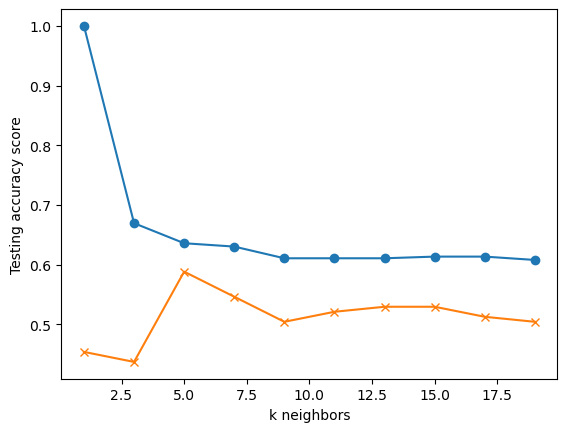

In [61]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.588


In [63]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)

confusion_matrix(y_true, y_pred)

array([[ 1,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  1,  1,  0,  1,  2],
       [ 0,  0,  0,  1,  7,  4,  7],
       [ 0,  0,  0,  2,  4, 11, 10],
       [ 0,  0,  0,  0,  3,  8, 50]])

In [64]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.33      0.33      0.33         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         0
           4       0.25      0.14      0.18         7
           5       0.50      0.37      0.42        19
           6       0.42      0.41      0.42        27
           7       0.72      0.82      0.77        61

    accuracy                           0.59       119
   macro avg       0.32      0.30      0.30       119
weighted avg       0.57      0.59      0.58       119



/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [65]:
knn.predict(X_test_scaled[0:10])

array([7, 7, 5, 7, 7, 5, 7, 6, 7, 7], dtype=int8)

In [66]:
knn.predict_proba(X_test_scaled[0:10])

array([[0. , 0. , 0. , 0. , 0.2, 0.2, 0.6],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0.2, 0.2, 0.4, 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.4, 0.6],
       [0. , 0. , 0. , 0.2, 0.2, 0.2, 0.4],
       [0. , 0. , 0.2, 0.2, 0.4, 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0.2, 0.6],
       [0. , 0. , 0. , 0. , 0.4, 0.6, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.4, 0.6],
       [0. , 0. , 0. , 0.2, 0. , 0.2, 0.6]])

In [67]:
hoops20_df = pd.read_csv('../Resources/2020Predictions.csv')
hoops20_df = hoops20_df.drop(['Unnamed: 0'], axis=True)

In [68]:
hoops20_df

,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,1,Kansas,B12,30,28,116.1,87.7,0.9616,53.7,43.7,...,26.4,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8,1.0
1,2,Baylor,B12,30,26,114.5,88.4,0.9513,49.4,45.2,...,29.8,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5,1.0
2,3,Gonzaga,WCC,33,31,121.3,94.3,0.9472,57.5,47.6,...,22.7,38.8,21.8,57.4,47.4,38.6,32.0,72.0,7.7,1.0
3,4,Dayton,A10,31,29,119.5,93.4,0.9445,59.7,46.6,...,26.6,33.9,30.9,62.3,45.1,37.1,33.0,67.5,6.8,1.0
4,5,Michigan St.,B10,31,22,114.8,91.3,0.9326,52.6,43.3,...,26.0,30.8,29.3,52.9,43.4,34.8,28.7,69.3,5.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,349,Arkansas Pine Bluff,SWAC,29,4,80.1,104.3,0.0461,43.1,48.9,...,30.7,37.4,46.3,44.6,50.2,26.3,31.1,66.1,-20.0,0.0
349,350,Maryland Eastern Shore,MEAC,31,5,82.1,108.0,0.0411,40.5,51.0,...,31.0,25.7,36.6,42.5,51.3,25.0,33.7,67.7,-20.8,0.0
350,351,Mississippi Valley St.,SWAC,30,4,89.2,119.0,0.0350,43.0,54.0,...,35.9,22.9,36.1,42.2,55.5,29.4,34.1,77.4,-22.2,0.0
351,352,Kennesaw St.,ASun,29,1,82.2,112.2,0.0269,39.3,55.3,...,31.2,32.5,30.4,40.2,55.0,24.8,37.1,68.2,-21.8,0.0


In [69]:
tourney_df = hoops20_df.loc[hoops20_df["POSTSEASON"] == 1]

In [70]:
tourney_df

,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,1,Kansas,B12,30,28,116.1,87.7,0.9616,53.7,43.7,...,26.4,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8,1.0
1,2,Baylor,B12,30,26,114.5,88.4,0.9513,49.4,45.2,...,29.8,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5,1.0
2,3,Gonzaga,WCC,33,31,121.3,94.3,0.9472,57.5,47.6,...,22.7,38.8,21.8,57.4,47.4,38.6,32.0,72.0,7.7,1.0
3,4,Dayton,A10,31,29,119.5,93.4,0.9445,59.7,46.6,...,26.6,33.9,30.9,62.3,45.1,37.1,33.0,67.5,6.8,1.0
4,5,Michigan St.,B10,31,22,114.8,91.3,0.9326,52.6,43.3,...,26.0,30.8,29.3,52.9,43.4,34.8,28.7,69.3,5.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,122,Wright St.,Horz,30,25,105.0,100.4,0.6245,51.0,46.5,...,29.4,37.8,27.1,49.9,47.3,35.5,30.0,72.0,-3.6,1.0
125,126,North Dakota St.,Sum,31,25,106.0,101.6,0.6184,51.9,49.2,...,19.0,33.3,26.6,51.2,49.3,35.2,32.7,65.9,-3.1,1.0
149,150,Eastern Washington,BSky,29,23,104.0,102.0,0.5540,52.0,49.1,...,27.0,29.6,33.7,52.2,48.0,34.4,34.3,73.1,-2.0,1.0
168,169,Winthrop,BSth,32,24,103.6,103.1,0.5136,53.0,50.7,...,24.1,36.3,41.9,54.1,52.0,34.4,32.3,71.8,-4.9,1.0


In [71]:
df = tourney_df.drop(["TEAM","RK","CONF","G","POSTSEASON"], axis=1)
df

,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,28,116.1,87.7,0.9616,53.7,43.7,18.7,18.6,32.6,26.4,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8
1,26,114.5,88.4,0.9513,49.4,45.2,17.8,22.7,35.8,29.8,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5
2,31,121.3,94.3,0.9472,57.5,47.6,15.3,18.4,33.6,22.7,38.8,21.8,57.4,47.4,38.6,32.0,72.0,7.7
3,29,119.5,93.4,0.9445,59.7,46.6,18.0,18.8,26.4,26.6,33.9,30.9,62.3,45.1,37.1,33.0,67.5,6.8
4,22,114.8,91.3,0.9326,52.6,43.3,18.1,15.8,32.8,26.0,30.8,29.3,52.9,43.4,34.8,28.7,69.3,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,25,105.0,100.4,0.6245,51.0,46.5,16.6,18.9,31.9,29.4,37.8,27.1,49.9,47.3,35.5,30.0,72.0,-3.6
125,25,106.0,101.6,0.6184,51.9,49.2,14.7,14.6,22.4,19.0,33.3,26.6,51.2,49.3,35.2,32.7,65.9,-3.1
149,23,104.0,102.0,0.5540,52.0,49.1,17.7,18.5,27.3,27.0,29.6,33.7,52.2,48.0,34.4,34.3,73.1,-2.0
168,24,103.6,103.1,0.5136,53.0,50.7,19.1,20.0,34.8,24.1,36.3,41.9,54.1,52.0,34.4,32.3,71.8,-4.9


In [72]:
X = df.values
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [73]:
predictions = knn.predict(X_scaled)
np.where(predictions == 1)[0]

array([2, 9])

In [74]:
predictions

array([3, 4, 1, 5, 7, 4, 6, 7, 7, 1, 6, 6, 6, 6, 6, 7, 7, 5, 6, 6, 4, 7,
       5, 7, 5, 6, 7, 7, 7, 7, 7, 6, 6, 7, 7, 7, 6, 7, 7, 7, 4, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7], dtype=int8)

In [75]:
knn.predict_proba(X_scaled[0:10])

array([[0. , 0. , 0.4, 0.2, 0.2, 0.2, 0. ],
       [0. , 0. , 0. , 0.6, 0. , 0.2, 0.2],
       [0.4, 0. , 0. , 0.2, 0.2, 0.2, 0. ],
       [0.2, 0. , 0. , 0. , 0.6, 0.2, 0. ],
       [0. , 0. , 0.2, 0. , 0.2, 0.2, 0.4],
       [0. , 0. , 0. , 0.4, 0.2, 0.4, 0. ],
       [0. , 0. , 0.2, 0.2, 0. , 0.4, 0.2],
       [0. , 0. , 0. , 0. , 0.2, 0. , 0.8],
       [0. , 0. , 0.2, 0.2, 0. , 0.2, 0.4],
       [0.2, 0.2, 0.2, 0.2, 0. , 0.2, 0. ]])

In [76]:
np.where(predictions == 1)[0]

array([2, 9])

In [77]:
tourney_df["TOURNAMENT"] = predictions

/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
tourney_df

,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,TOURNAMENT
0,1,Kansas,B12,30,28,116.1,87.7,0.9616,53.7,43.7,...,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8,1.0,3
1,2,Baylor,B12,30,26,114.5,88.4,0.9513,49.4,45.2,...,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5,1.0,4
2,3,Gonzaga,WCC,33,31,121.3,94.3,0.9472,57.5,47.6,...,38.8,21.8,57.4,47.4,38.6,32.0,72.0,7.7,1.0,1
3,4,Dayton,A10,31,29,119.5,93.4,0.9445,59.7,46.6,...,33.9,30.9,62.3,45.1,37.1,33.0,67.5,6.8,1.0,5
4,5,Michigan St.,B10,31,22,114.8,91.3,0.9326,52.6,43.3,...,30.8,29.3,52.9,43.4,34.8,28.7,69.3,5.2,1.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,122,Wright St.,Horz,30,25,105.0,100.4,0.6245,51.0,46.5,...,37.8,27.1,49.9,47.3,35.5,30.0,72.0,-3.6,1.0,7
125,126,North Dakota St.,Sum,31,25,106.0,101.6,0.6184,51.9,49.2,...,33.3,26.6,51.2,49.3,35.2,32.7,65.9,-3.1,1.0,7
149,150,Eastern Washington,BSky,29,23,104.0,102.0,0.5540,52.0,49.1,...,29.6,33.7,52.2,48.0,34.4,34.3,73.1,-2.0,1.0,7
168,169,Winthrop,BSth,32,24,103.6,103.1,0.5136,53.0,50.7,...,36.3,41.9,54.1,52.0,34.4,32.3,71.8,-4.9,1.0,7


In [25]:
len(predictions)

353